In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
def seed():
    import numpy as np
    import tensorflow as tf
    import random as python_random

    np.random.seed(0)

    python_random.seed(0)

    tf.random.set_seed(0)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import shutil
import numpy as np
seed()
class_names = ['Normal','Pneumonia']
root_dir = '/content/drive/MyDrive/Dataset'

seed()
if os.path.isdir(os.path.join(root_dir, class_names[1])):
    os.mkdir(os.path.join(root_dir, 'test'))

    for c in class_names:
        os.mkdir(os.path.join(root_dir, 'test', c))

    for c in class_names:
        if c=='Normal':
            images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('png') or x.lower().endswith('jpeg')]
            selected_images = random.sample(images, 316)
            for image in selected_images:
                source_path = os.path.join(root_dir, c, image)
                target_path = os.path.join(root_dir, 'test', c, image)
                shutil.move(source_path, target_path)
        elif c=='Pneumonia':
            images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('png') or x.lower().endswith('jpeg')]
            selected_images = random.sample(images, 854)
            for image in selected_images:
                source_path = os.path.join(root_dir, c, image)
                target_path = os.path.join(root_dir, 'test', c, image)
                shutil.move(source_path, target_path)

In [ ]:
import os
class_names = ['Normal','Pneumonia']
root_dir = '/content/drive/MyDrive/Dataset'

seed()
if os.path.isdir(os.path.join(root_dir, class_names[1])):
    os.mkdir(os.path.join(root_dir, 'train'))

    for c in class_names:
        os.mkdir(os.path.join(root_dir, 'train', c))

    for c in class_names:
        if c=='Normal':
            images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('png') or x.lower().endswith('jpeg')]
            for image in images:
                source_path = os.path.join(root_dir, c, image)
                target_path = os.path.join(root_dir, 'train', c, image)
                shutil.move(source_path, target_path)
        elif c=='Pneumonia':
            images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('png') or x.lower().endswith('jpeg')]
            for image in images:
                source_path = os.path.join(root_dir, c, image)
                target_path = os.path.join(root_dir, 'train', c, image)
                shutil.move(source_path, target_path)

In [5]:
seed()
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/test'

Working with 316 images
Image examples: 
IM-0530-0001.jpeg


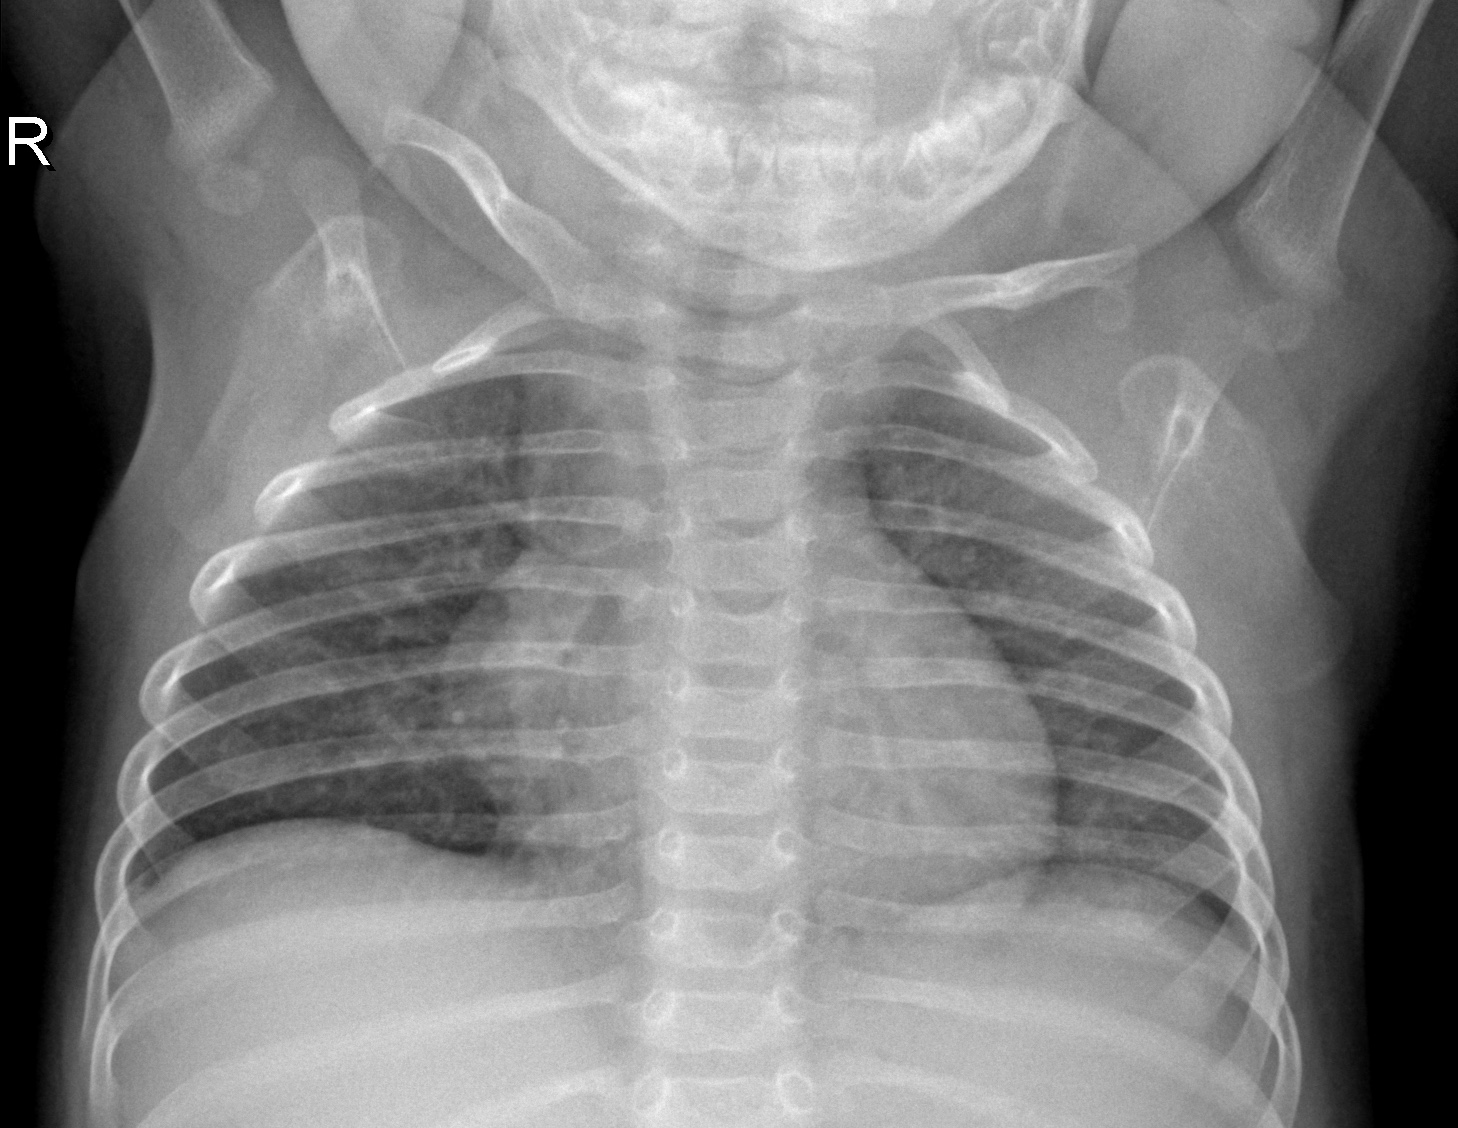

IM-0545-0001-0001.jpeg


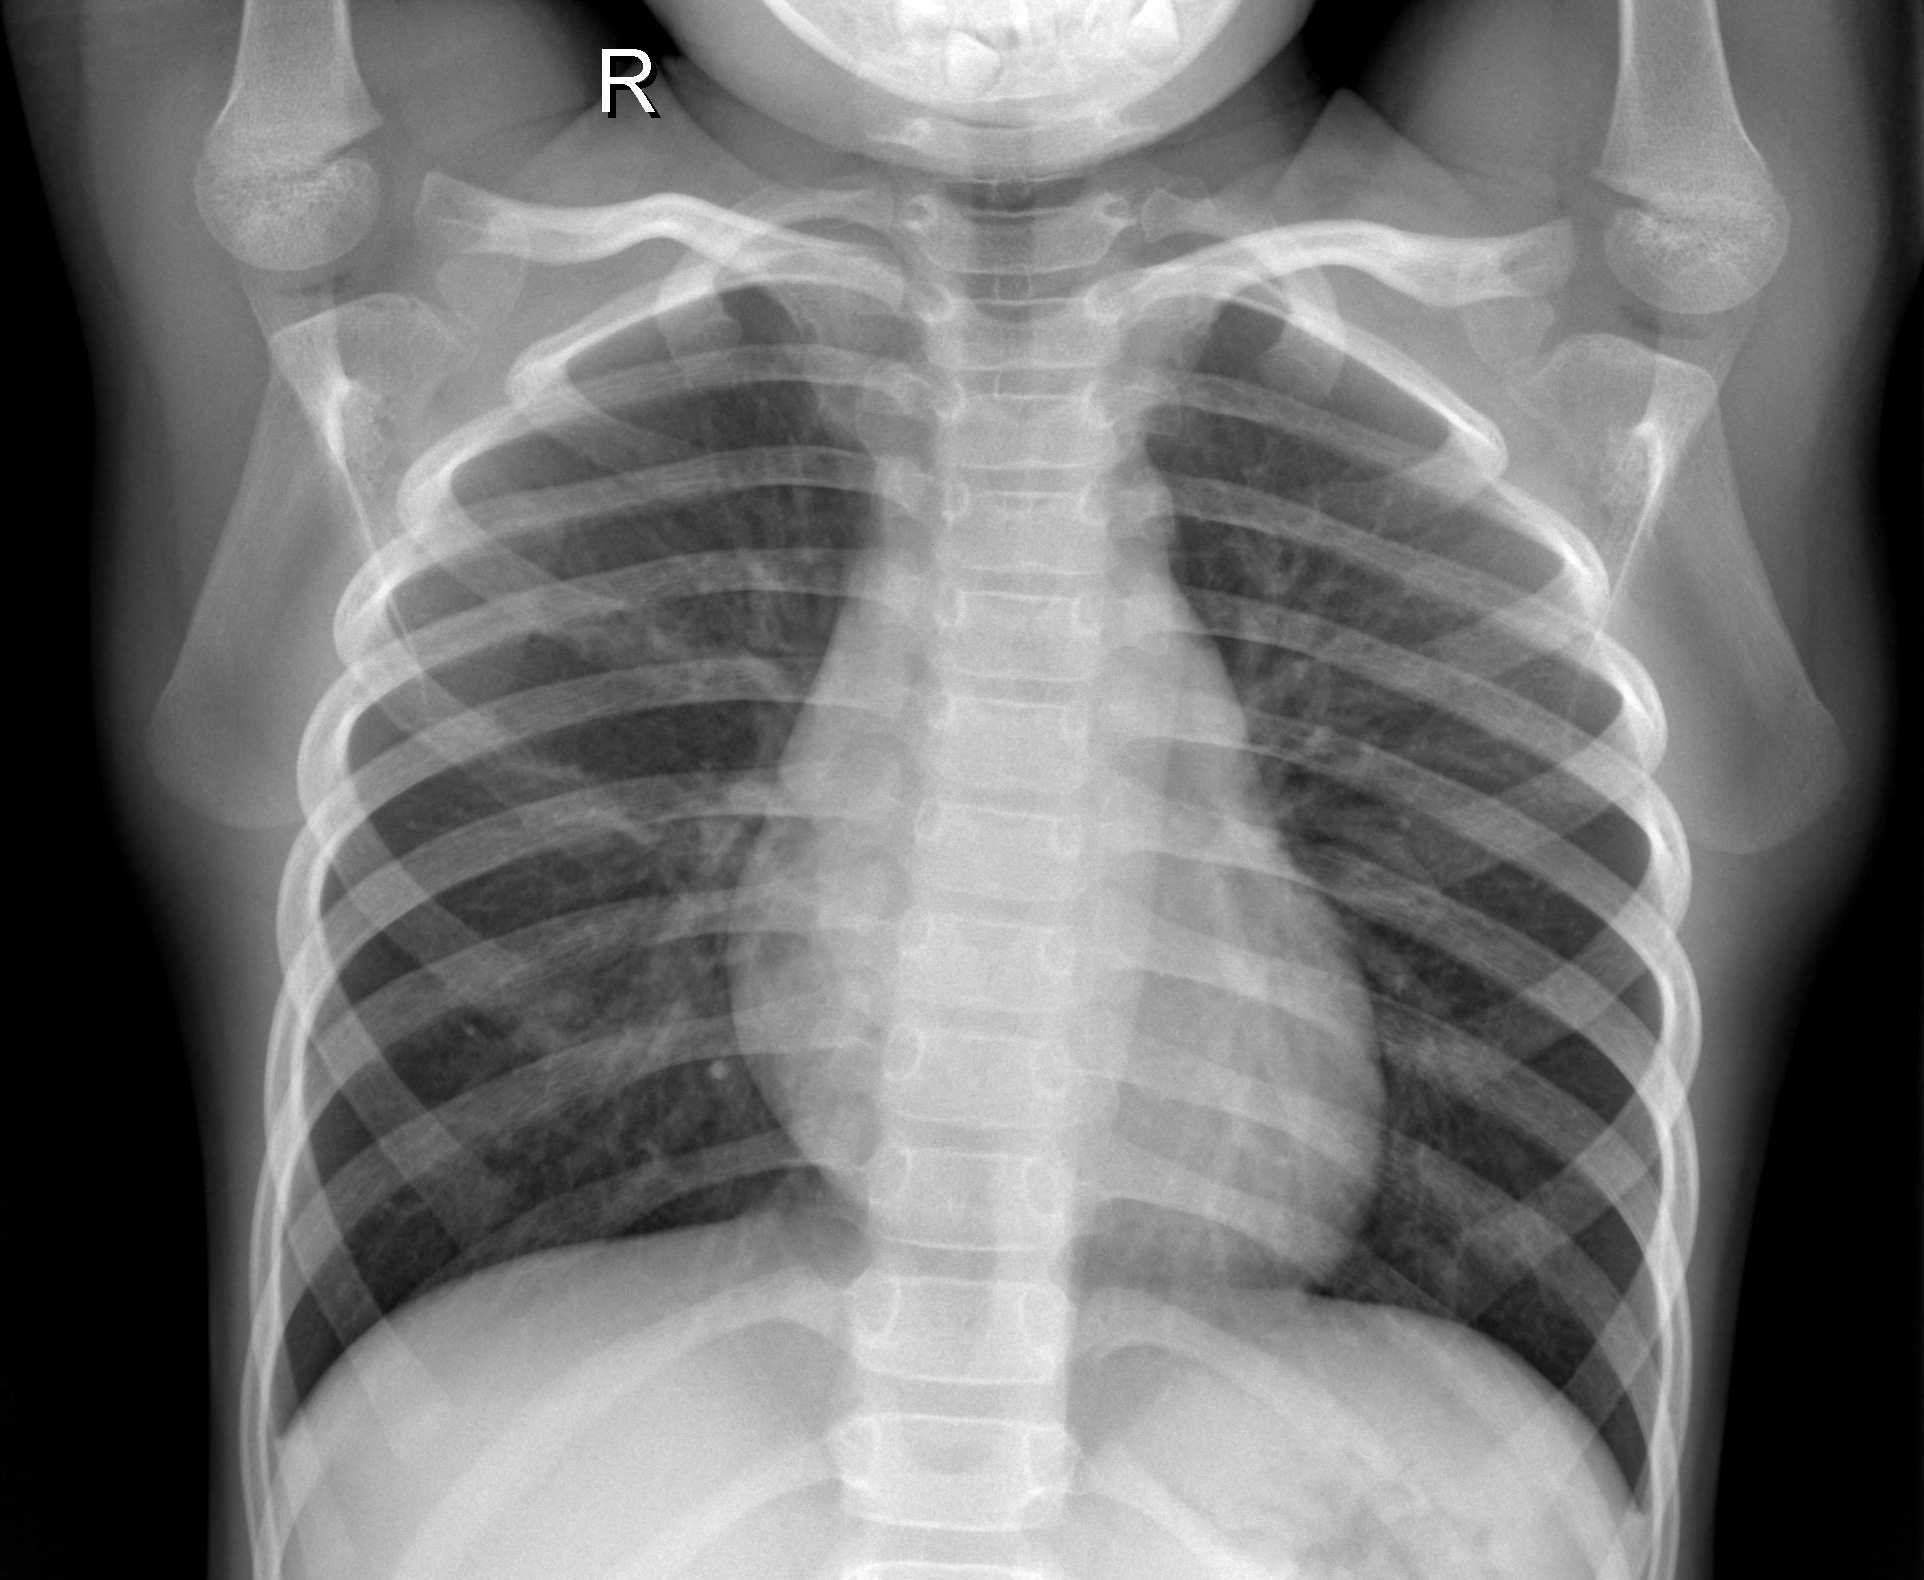

IM-0531-0001-0001.jpeg


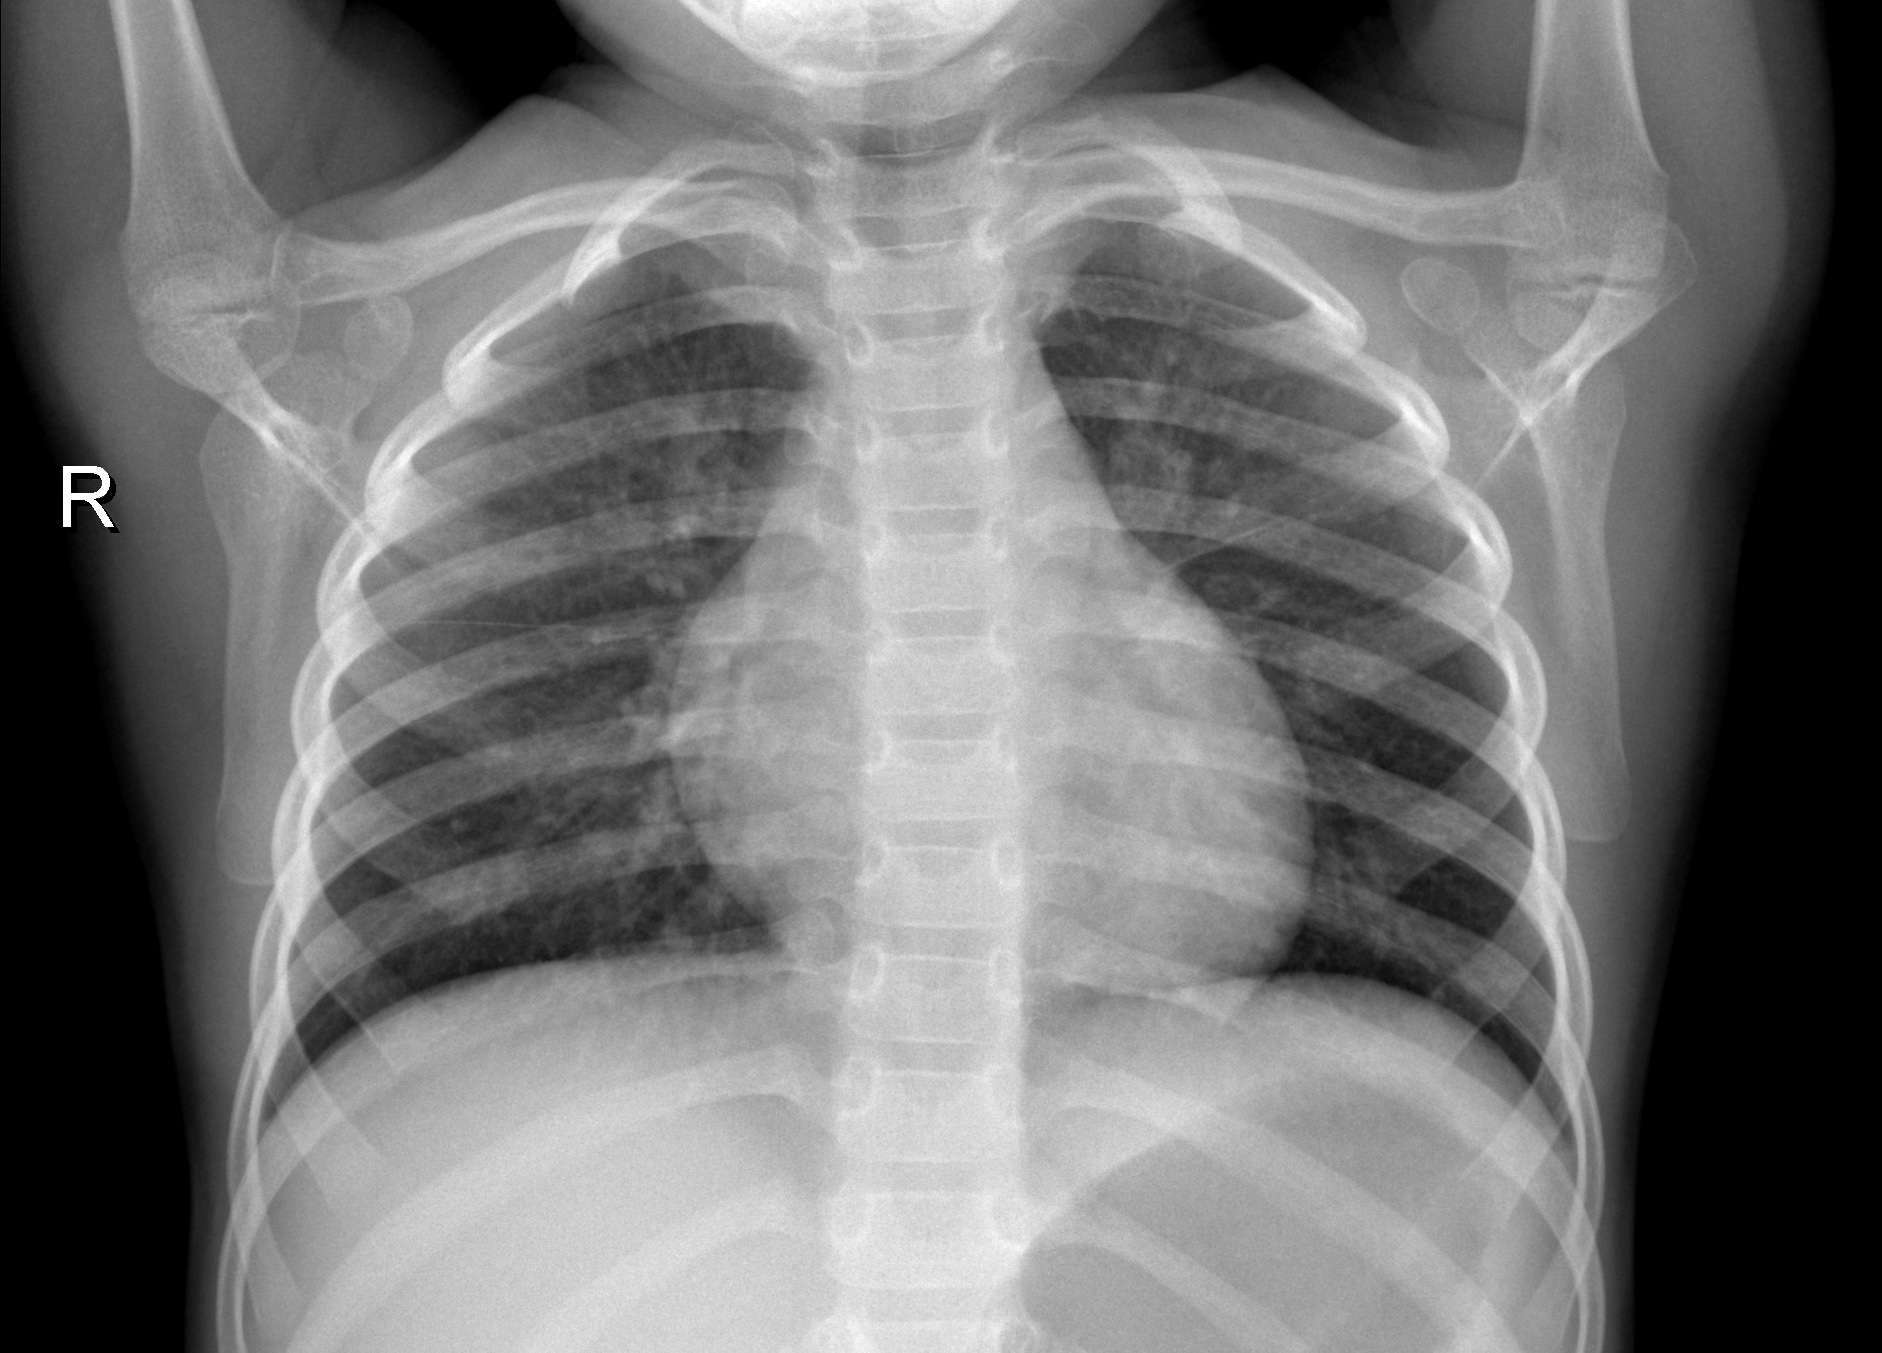

IM-0536-0001.jpeg


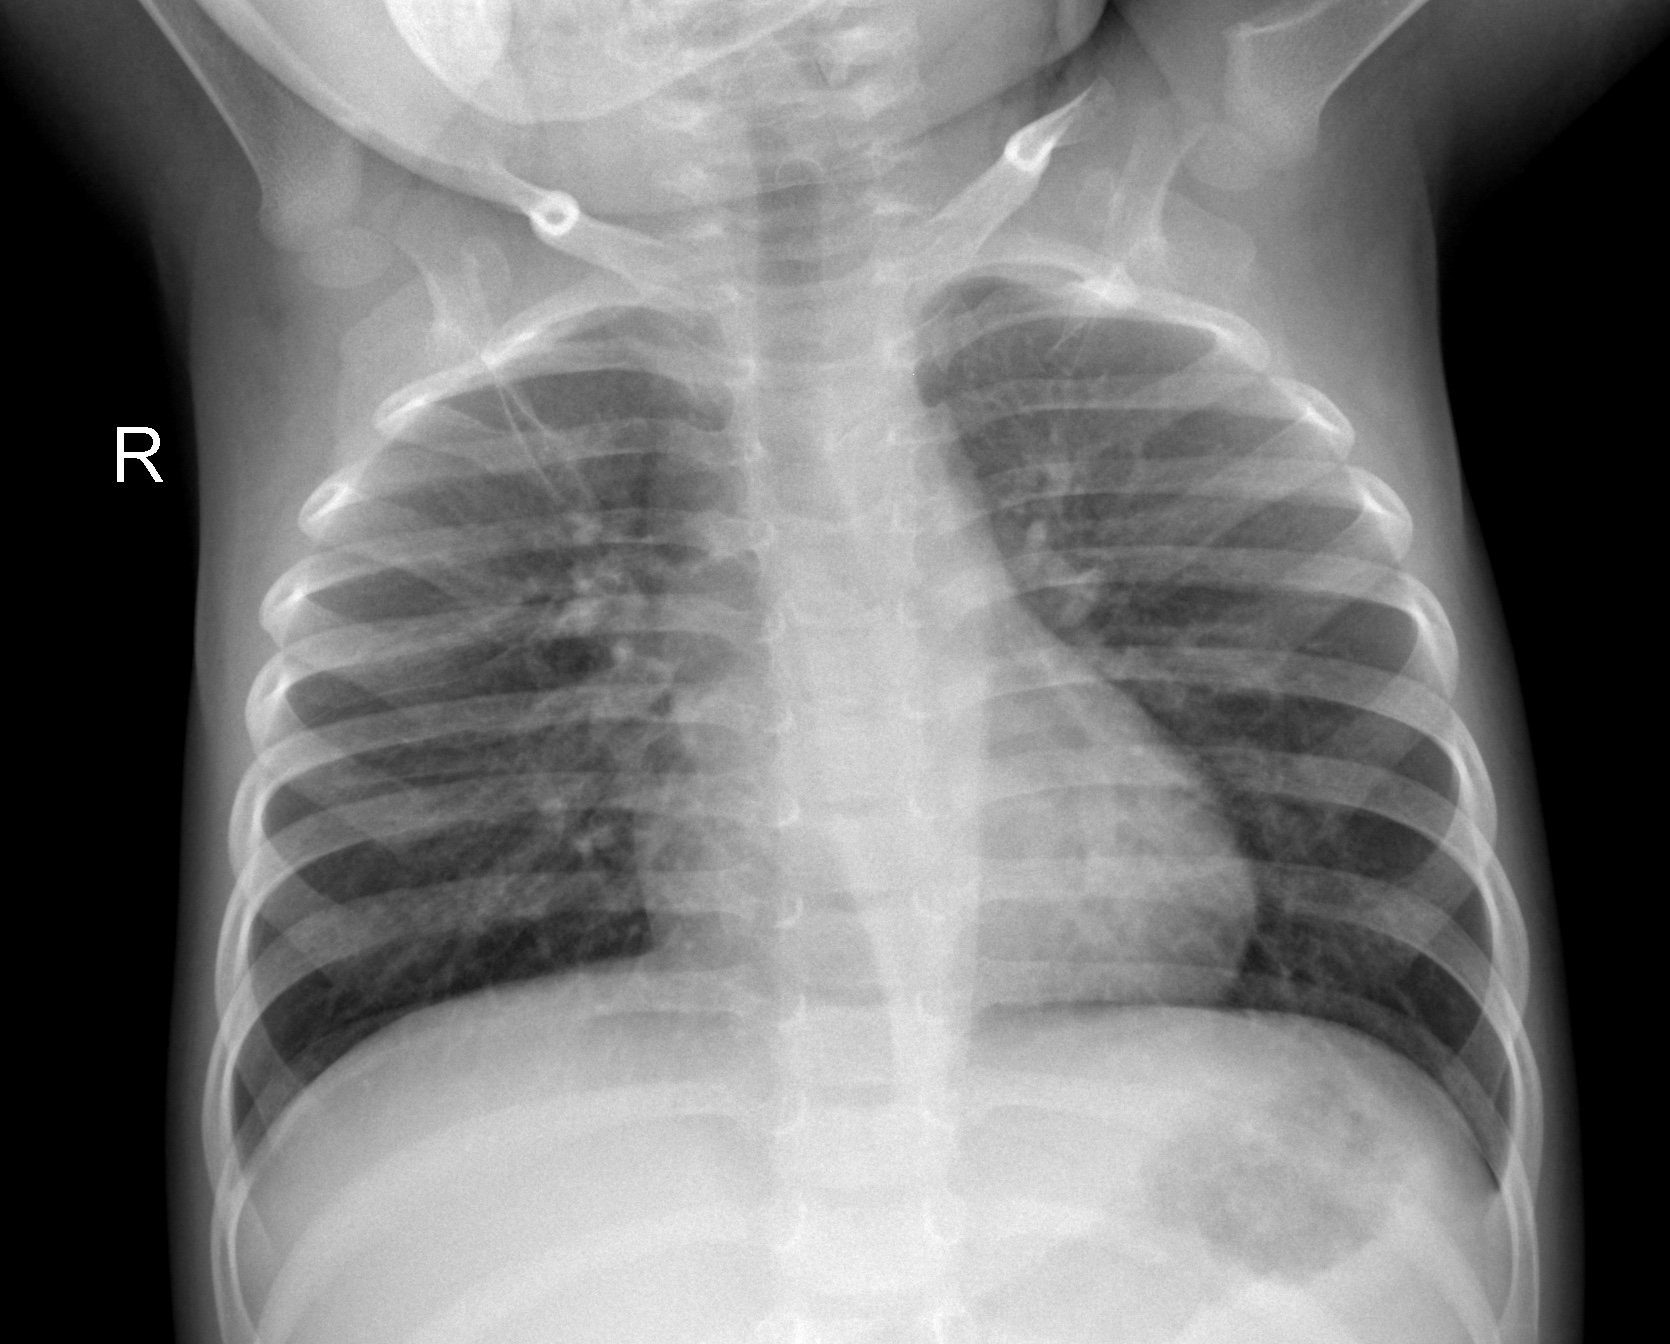

IM-0538-0001.jpeg


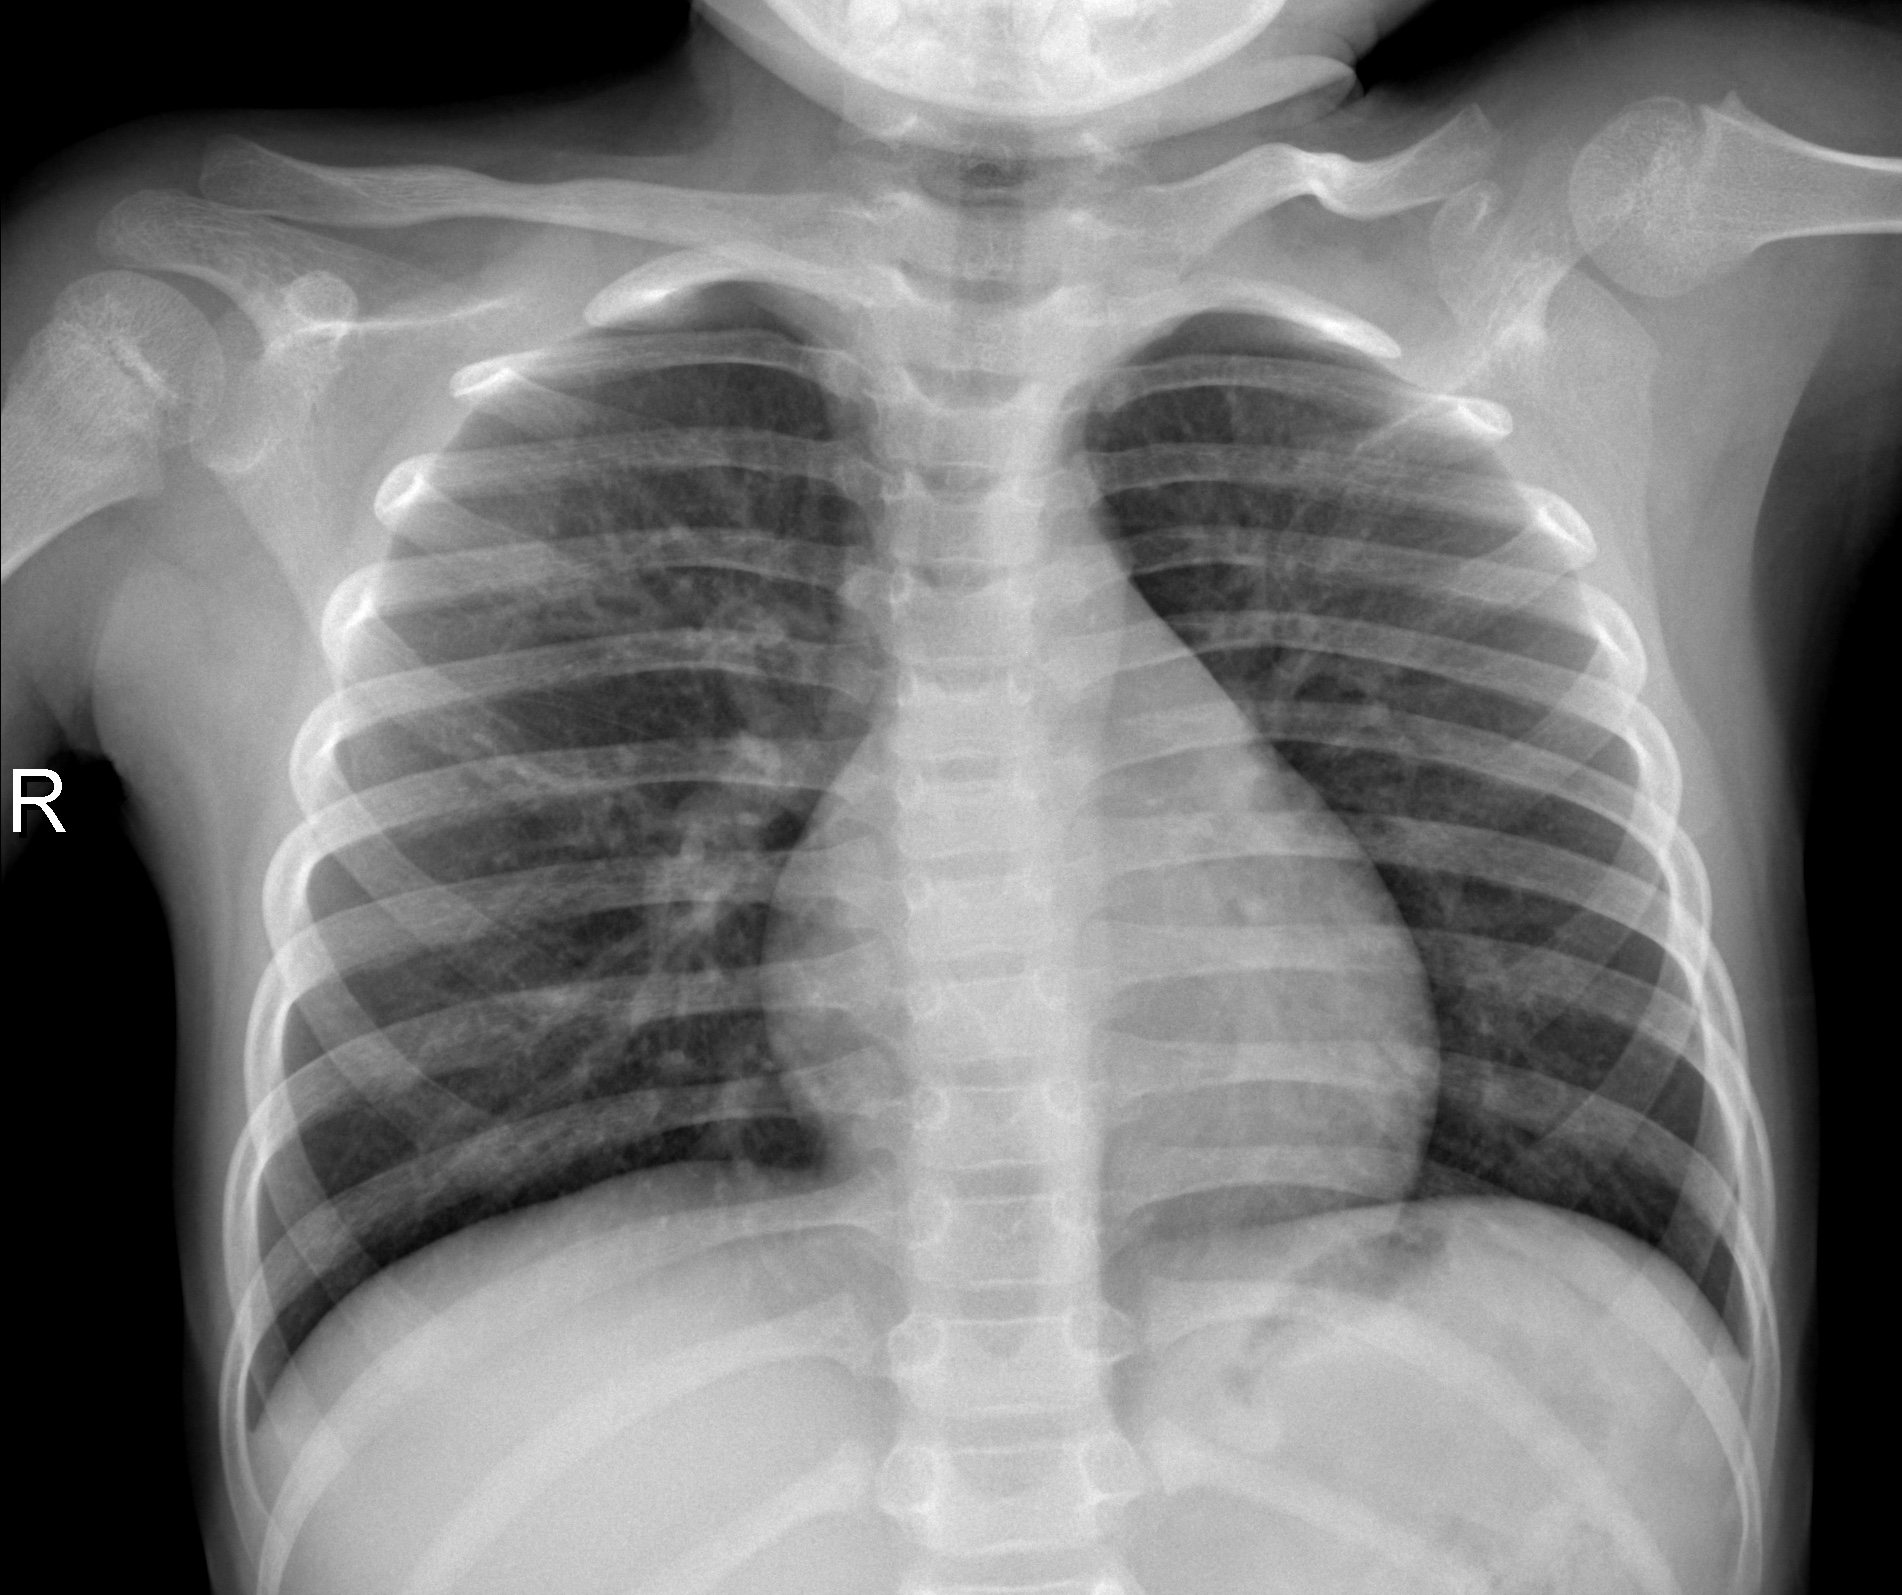

IM-0549-0001.jpeg


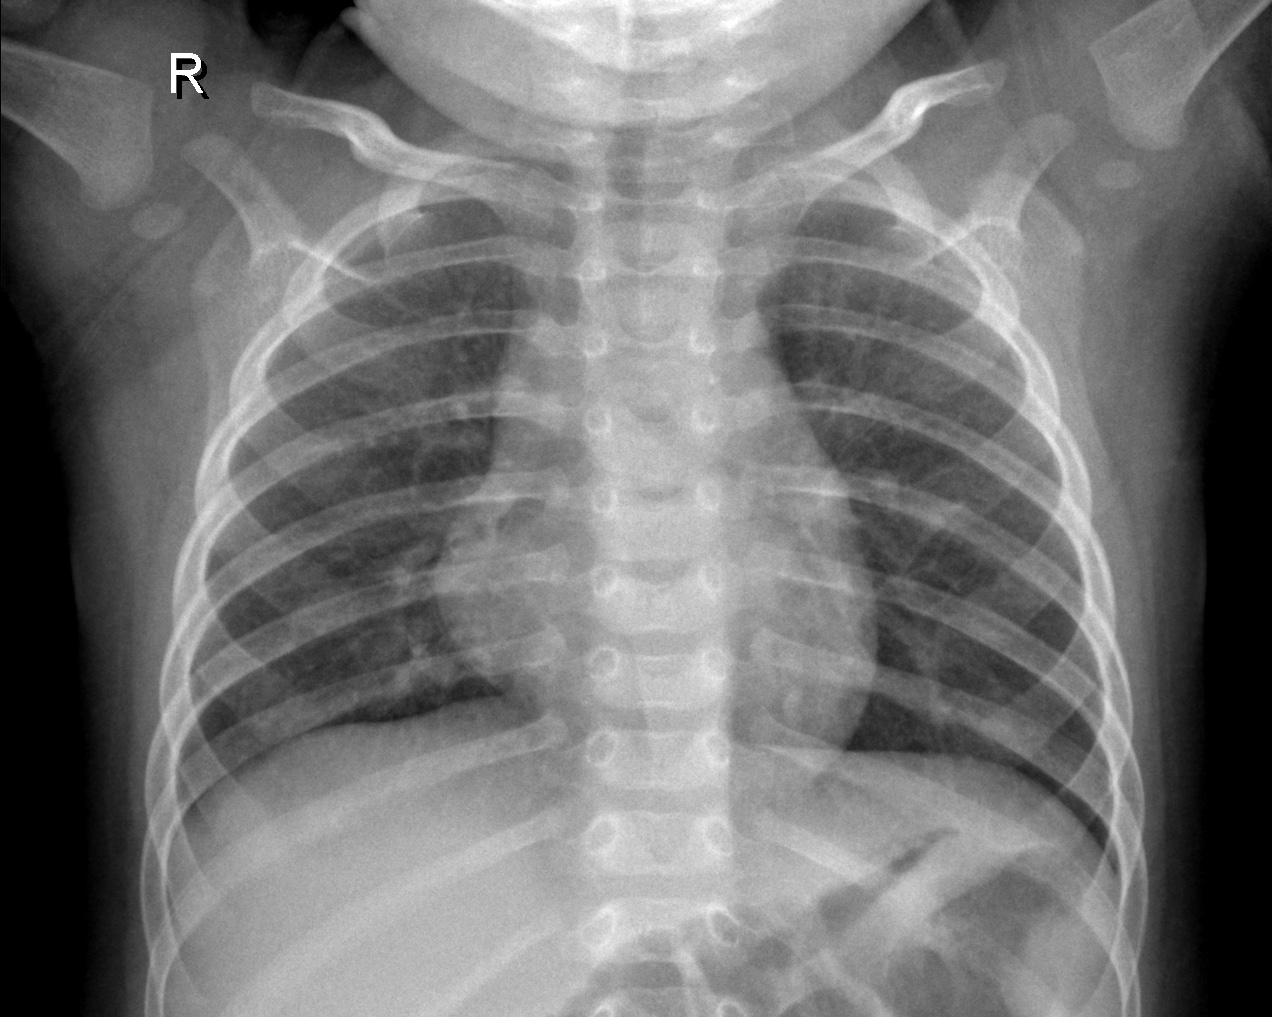

IM-0539-0001-0002.jpeg


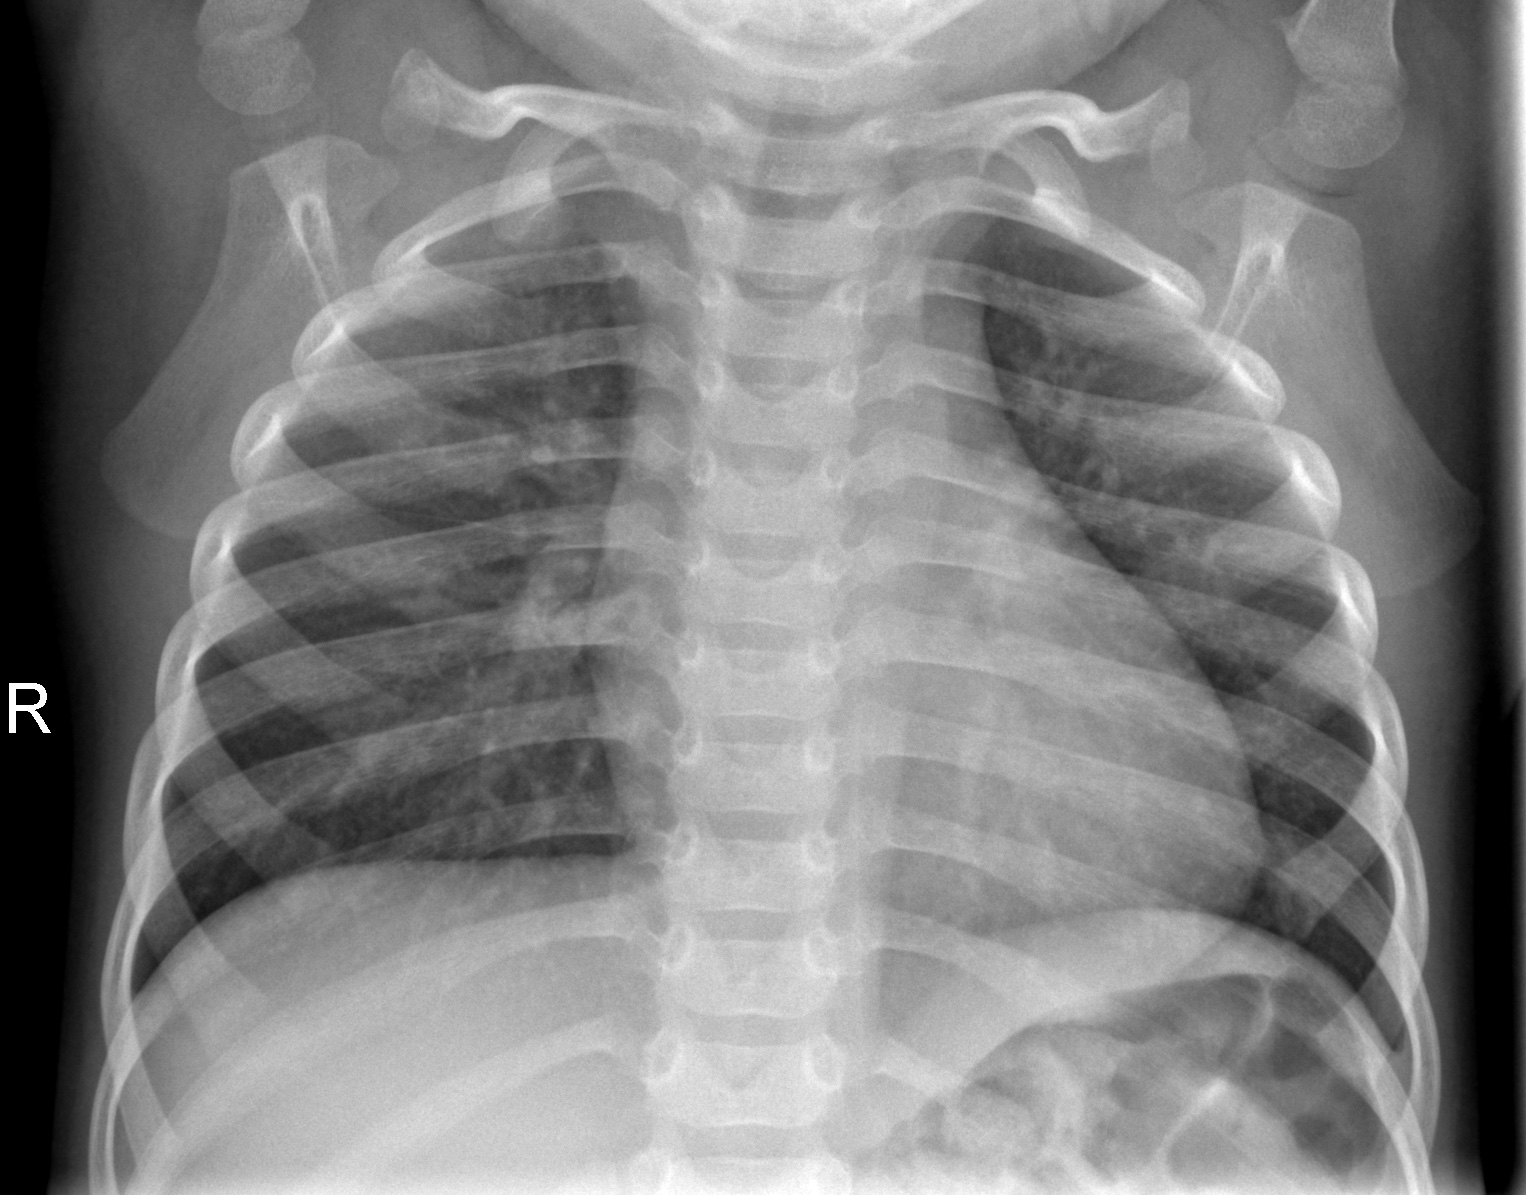

IM-0540-0001.jpeg


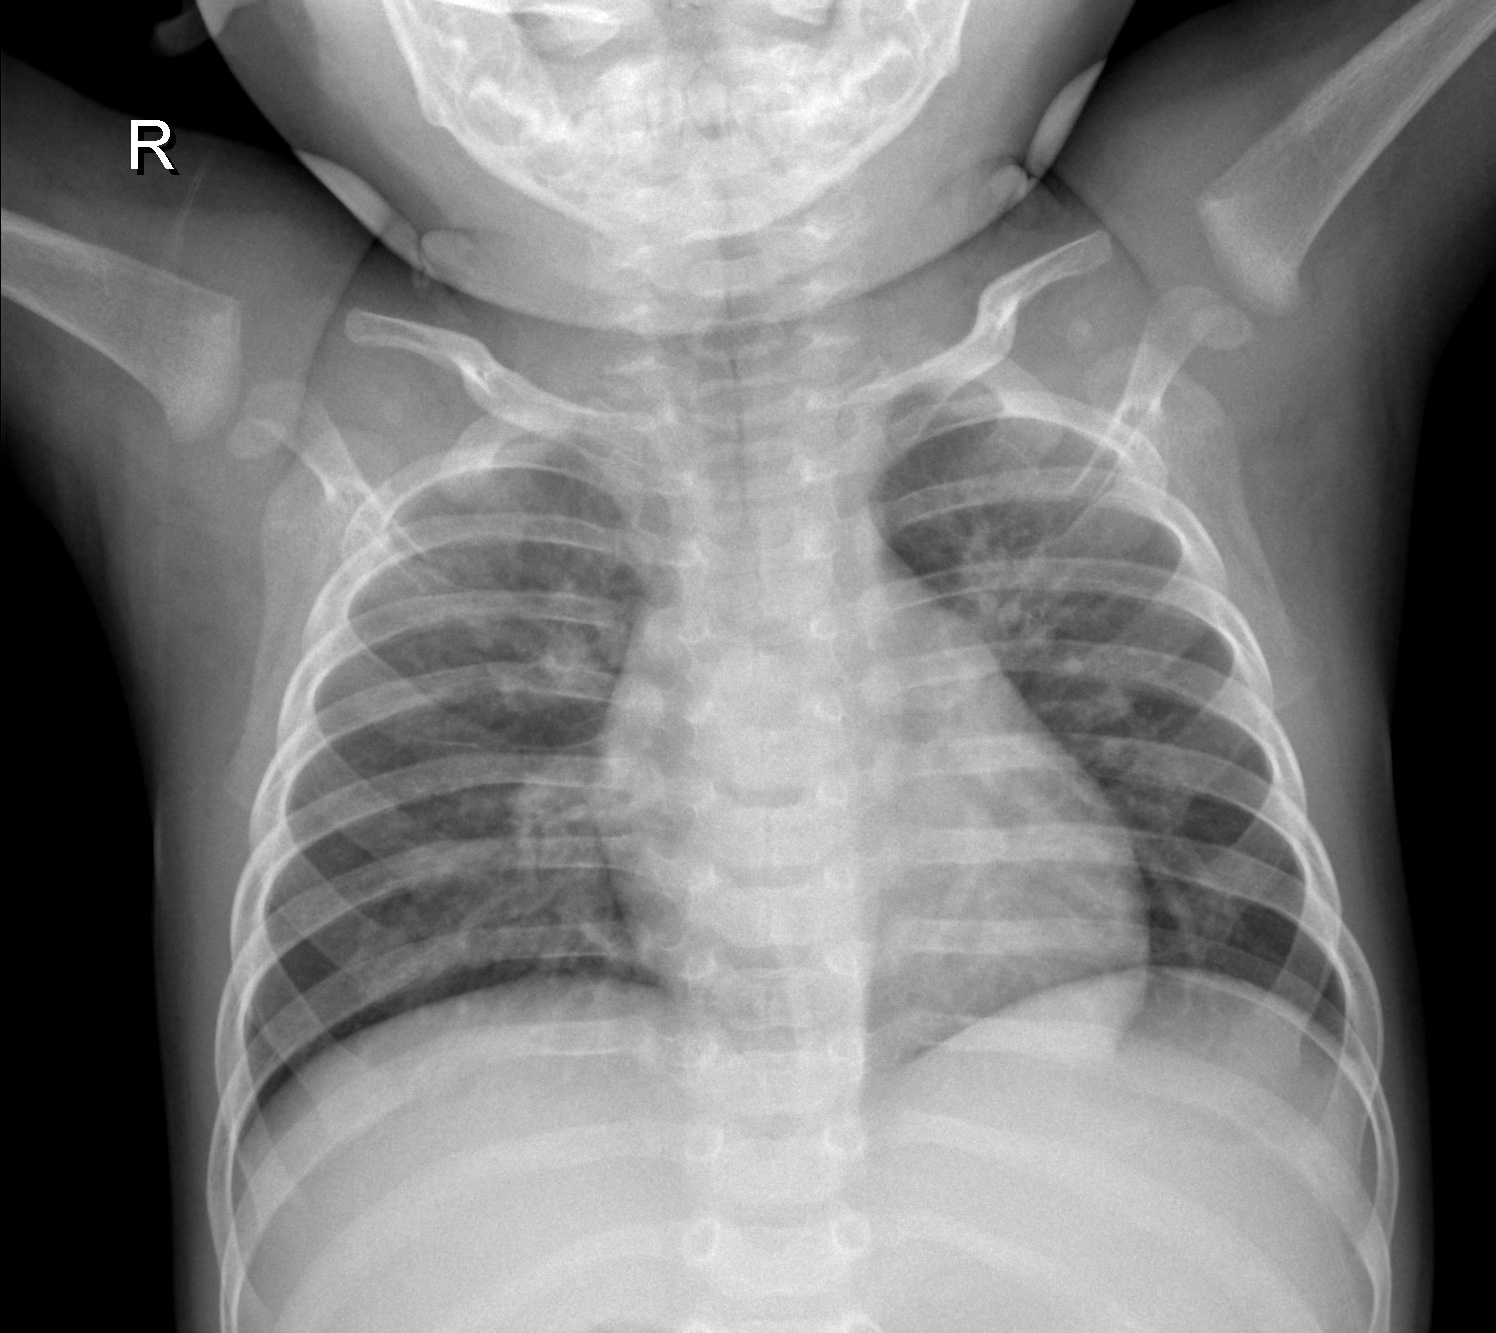

IM-0546-0001.jpeg


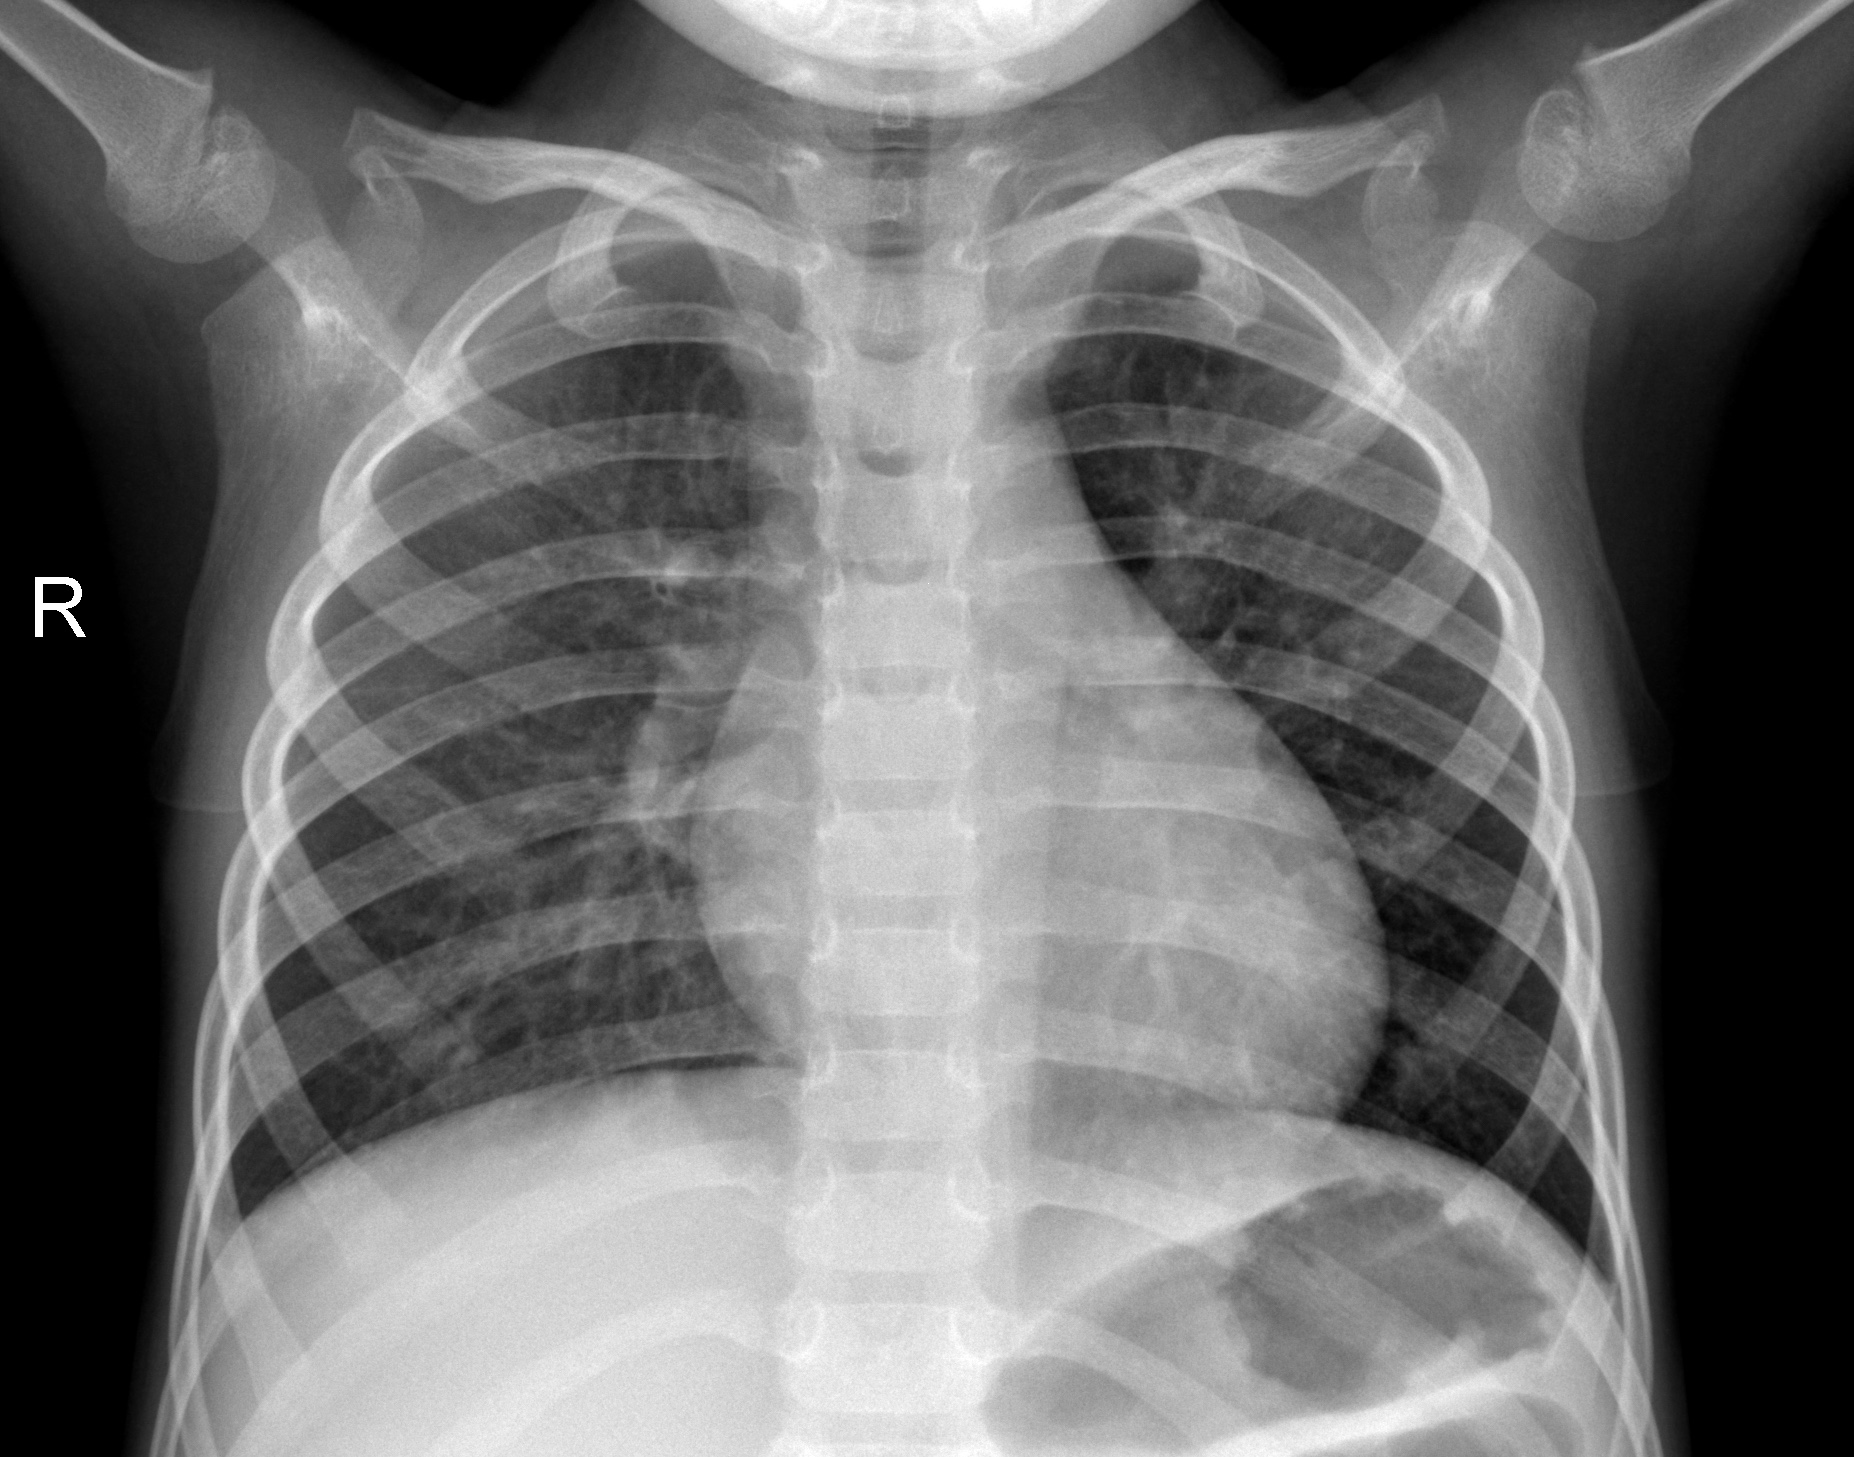

IM-0528-0001.jpeg


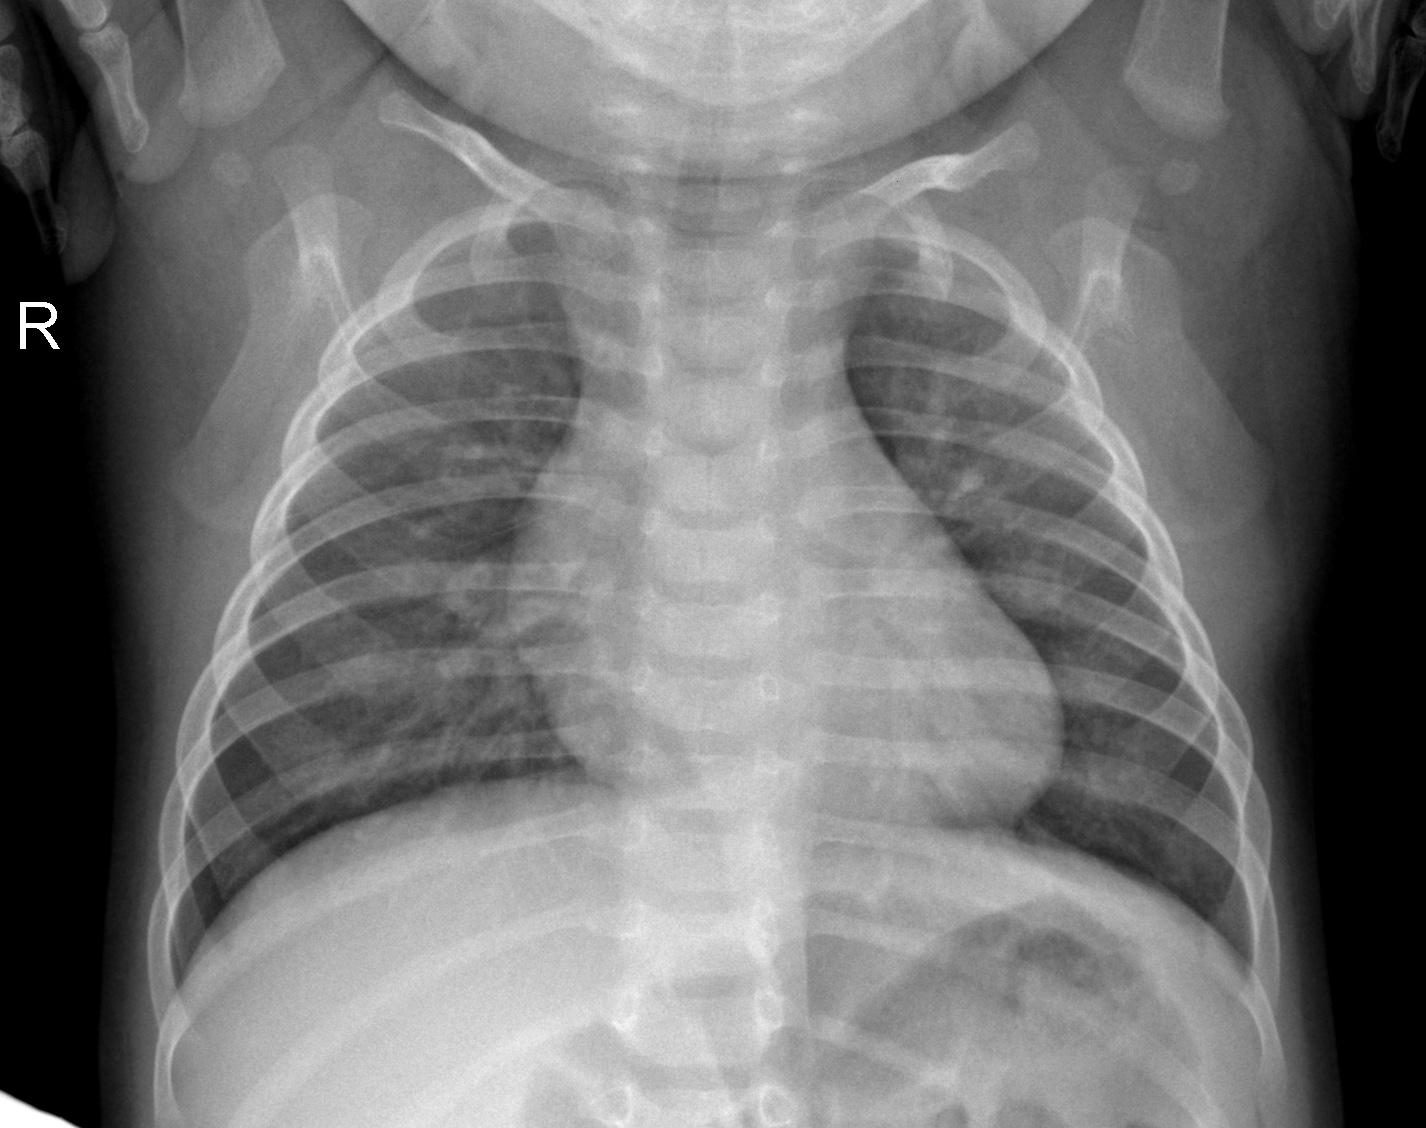

In [ ]:
seed()
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = test_path+'/Normal'


onlypneumoniafiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlypneumoniafiles)))
print("Image examples: ")


for i in range(10):
    print(onlypneumoniafiles[i])
    display(_Imgdis(filename=folder + "/" + onlypneumoniafiles[i], width=240, height=240))

In [6]:
seed()
folders = glob('/content/drive/MyDrive/Dataset/train/*')
print(len(folders))

2


In [7]:
seed()
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
seed()
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [9]:
seed()
train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size=32,
                                                 class_mode = 'categorical')

Found 4686 images belonging to 2 classes.


In [10]:
seed()
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            shuffle=False,
                                            batch_size=32,
                                            class_mode = 'categorical')

Found 1170 images belonging to 2 classes.


In [11]:
seed()
input_tensor=Input(shape=(224,224,3))

In [12]:
seed()
base_model1 = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
features1 = base_model1.output
for layer in base_model1.layers:
  layer.trainable=True
for layer in base_model1.layers:  
  layer._name = layer._name + str('_C')

58892288/58889256 [==============================] - 0s 0us/step


In [13]:
seed()
base_model2 = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
features2 = base_model2.output
for layer in base_model2.layers:
  layer.trainable=False
for layer in base_model2.layers:  
  layer._name = layer._name + str('_D')

In [14]:
seed()
from tensorflow.keras.layers import concatenate
concatenated=concatenate([features1,features2]) 

In [15]:
seed()
x = Flatten(name='flatten')(concatenated)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(len(folders), activation='softmax', name='predictions')(x)

In [16]:
seed()
Concatenated_model = Model(inputs=input_tensor, outputs=x)

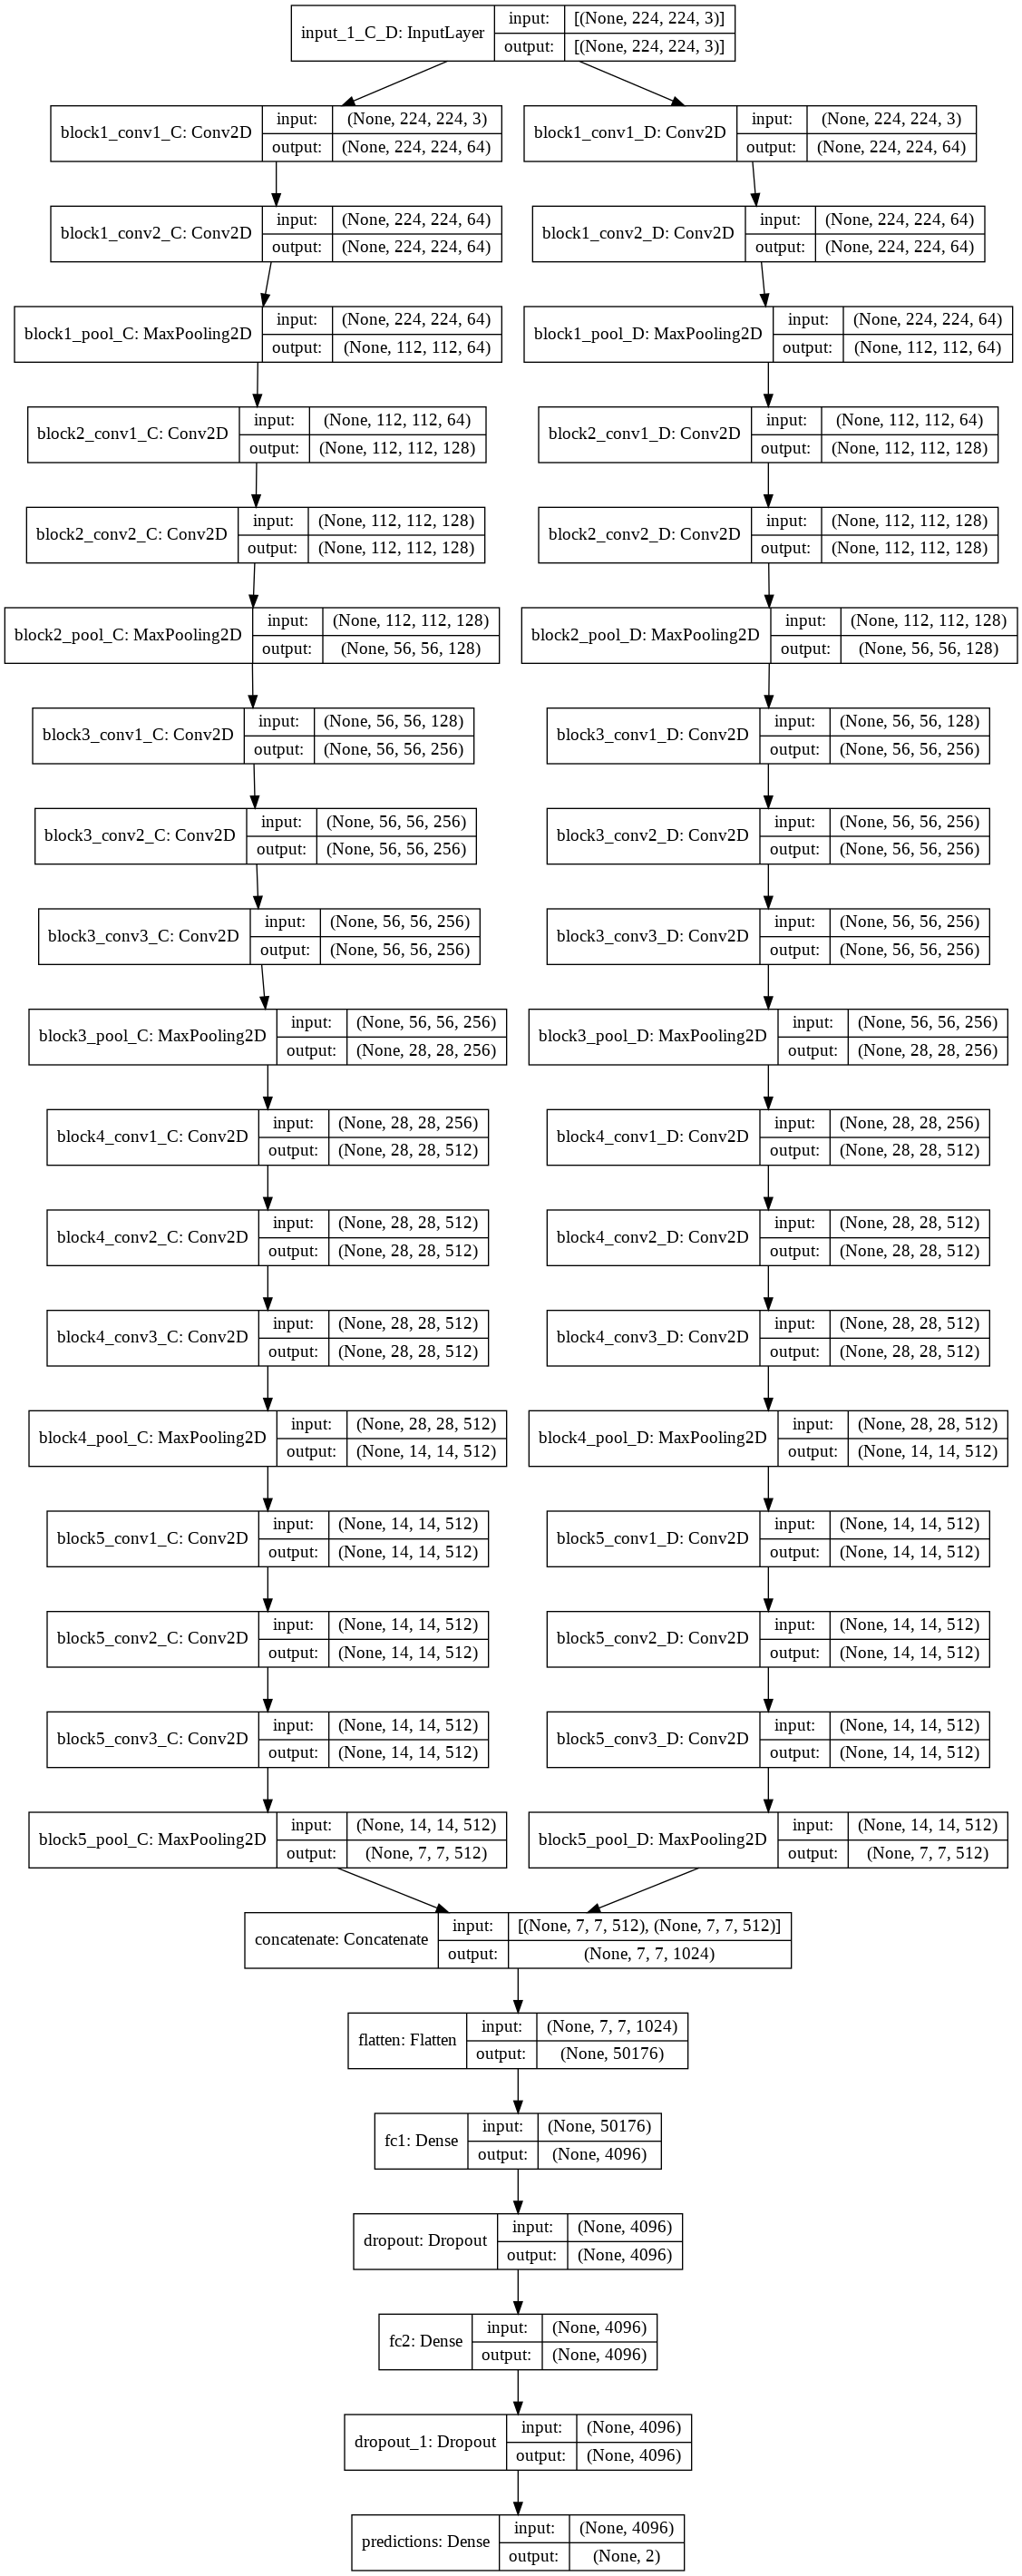

In [ ]:
seed()
from tensorflow.keras.utils import plot_model
plot_model(Concatenated_model, show_shapes=True)

In [ ]:
Concatenated_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_C_D (InputLayer)        [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1_C (Conv2D)         (None, 224, 224, 64) 1792        input_1_C_D[0][0]                
__________________________________________________________________________________________________
block1_conv1_D (Conv2D)         (None, 224, 224, 64) 1792        input_1_C_D[0][0]                
__________________________________________________________________________________________________
block1_conv2_C (Conv2D)         (None, 224, 224, 64) 36928       block1_conv1_C[0][0]             
______________________________________________________________________________________________

In [17]:
seed()
from tensorflow.keras import optimizers
adagrad = optimizers.Adagrad()
seed()
Concatenated_model.compile(loss='binary_crossentropy',
              optimizer=adagrad,
              metrics=['accuracy'])

In [18]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
seed()


checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/VGG_Boosted_Adagrad.h5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)
seed()
callbacks = [checkpoint]

start = datetime.now()
seed()
Concatenated_model_history=Concatenated_model.fit(
    train_set,
  validation_data=test_set,
  epochs=10,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/10
147/147 [==============================] - 1622s 11s/step - loss: 1.7584 - accuracy: 0.8801 - val_loss: 0.1438 - val_accuracy: 0.9513

Epoch 00001: val_accuracy improved from -inf to 0.95128, saving model to /content/drive/MyDrive/VGG_Boosted_Adagrad.h5
Epoch 2/10
147/147 [==============================] - 189s 1s/step - loss: 0.2019 - accuracy: 0.9287 - val_loss: 0.1518 - val_accuracy: 0.9402

Epoch 00002: val_accuracy did not improve from 0.95128
Epoch 3/10
147/147 [==============================] - 134s 909ms/step - loss: 0.1866 - accuracy: 0.9334 - val_loss: 0.1255 - val_accuracy: 0.9564

Epoch 00003: val_accuracy improved from 0.95128 to 0.95641, saving model to /content/drive/MyDrive/VGG_Boosted_Adagrad.h5
Epoch 4/10
147/147 [==============================] - 188s 1s/step - loss: 0.1813 - accuracy: 0.9345 - val_loss: 0.1384 - val_accuracy: 0.9513

Epoch 00004: val_accuracy did not improve from 0.95641
Epoch 5/10
147/147 [==============================] - 135s 913ms/ste

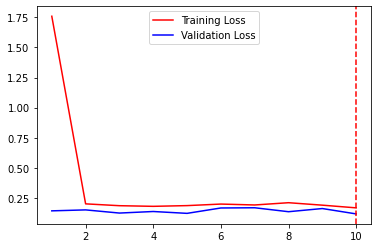

In [19]:
validation_loss=Concatenated_model_history.history['val_loss']
training_loss=Concatenated_model_history.history['loss']
epoch_count=range(1, len(validation_loss)+1)
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, validation_loss, 'b-')
minposs = validation_loss.index(min(validation_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Minimum Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [20]:
seed()
from keras.models import load_model
network = load_model('/content/drive/MyDrive/VGG_Boosted_Adagrad.h5')

In [21]:
seed()
test_set_evaluation = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode = 'categorical')
network.evaluate(test_set_evaluation, steps=1170)

Found 1170 images belonging to 2 classes.
1170/1170 [==============================] - 45s 24ms/step - loss: 0.1184 - accuracy: 0.9573


[0.11839063465595245, 0.9572649598121643]

In [22]:
seed()
test_set_evaluation = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode = 'categorical')
preds=[]
predictions=network.predict(test_set_evaluation, steps=1170, verbose=1)
for i in range(len(predictions)):
    if predictions[i][0]>predictions[i][1]:
      preds.append(0)
    else:
      preds.append(1)

Found 1170 images belonging to 2 classes.
1170/1170 [==============================] - 27s 22ms/step


In [23]:
# Method 1 for Confusion Matrix
seed()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_test=test_set_evaluation.classes
cf_matrix=confusion_matrix(y_test, preds)
print(cf_matrix)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

[[305  11]
 [ 39 815]]


0.9572649572649573

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Pneumonia')]

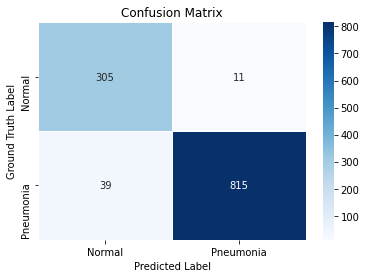

In [2]:
matrix=[[305,11],
        [39, 815]]

import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Label');ax.set_ylabel('Ground Truth Label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])